<a href="https://colab.research.google.com/github/Purvak08/Data-Analysis-Projects/blob/main/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement: Navigating the Data Science Job Landscape**

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core objectives of this challenge are as follows:

1. Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

2. Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

3. Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

4. Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

* LinkedIn Jobs
* Indeed
* Naukri
* Glassdoor
* AngelList

🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this exciting journey?






In [ ]:
pip install requests

In [ ]:
pip install bs4

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=231d5d3c749971d6be3b167d29d4b844ae6b46a3bf71cac4a0b291274bb376b7
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


In [ ]:
pip install html5lib

In [ ]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd

# Replace this with the actual URL of the job listings page
url = 'https://www.linkedin.com/jobs/search/?currentJobId=3693535231&geoId=102713980&keywords=data%20science&location=India&origin=JOBS_HOME_SEARCH_BUTTON&refresh=true'

# Send an HTTP GET request to the URL# Send a GET request to the URL and get the HTML content
response = requests.get(url)
html_content = response.content

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content of the page with BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all job listings
    job_listings = soup.find_all('div', class_='base-search-card')

    # Create lists to store the extracted data
    job_titles = []
    company_names = []
    locations = []
    descriptions = []
    qualifications_list = []
    salaries = []
    deadlines = []

    # Loop through each job listing and extract the desired information
    for job_listing in job_listings:
        # Extract job title
        job_title = job_listing.find('h3', class_='base-search-card__title').text.strip()
        job_titles.append(job_title)

        # Extract company name
        company_name = job_listing.find('h4', class_='base-search-card__subtitle').text.strip()
        company_names.append(company_name)

        # Extract location
        location = job_listing.find('span', class_='job-search-card__location').text.strip()
        locations.append(location)

        # Extract the job description (if available)
        description = job_listing.find('div', class_='description')
        if description:
            description = description.text.strip()
        else:
            description = "Description not available"
        descriptions.append(description)

        # Extract qualifications (if available)
        qualifications_data = job_listing.find('div', class_='qualifications')
        if qualifications_data:
            qualifications = qualifications_data.text.strip()
        else:
            qualifications = "Qualifications not available"
        qualifications_list.append(qualifications)

        # Extract salary (if available)
        salary_data = job_listing.find('div', class_='salary')
        if salary_data:
            salary = salary_data.text.strip()
        else:
            salary = "Salary not available"
        salaries.append(salary)

        # Extract deadline (if available)
        deadline_data = job_listing.find('time', class_='job-search-card__listdate')
        if deadline_data:
            deadline = deadline_data['datetime']
        else:
            deadline = "Deadline not available"
        deadlines.append(deadline)

    # Create a Pandas DataFrame from the extracted data
    df = pd.DataFrame({
        'Job Title': job_titles,
        'Company Name': company_names,
        'Location': locations,
        'Description': descriptions,
        'Qualifications': qualifications,
        'Salary': salaries,
        'Deadline': deadlines
    })

    # Print the DataFrame
    print(df)

else:
    print("Failed to retrieve the web page. Status code:", response.status_code)



                                            Job Title  \
0                              Applied Data Scientist   
1                    Junior Data Scientist - IIT/BITS   
2                                      Data Scientist   
3                              Applied Data Scientist   
4   Data Analytics Internship in Dehradun, Bangalo...   
5                               Junior Data Scientist   
6                              Applied Data Scientist   
7                                 Front End Developer   
8                                      Data Scientist   
9                           Data Science - Internship   
10                               AI/ML Data Scientist   
11              KreditBee - Data Analyst - SQL/Python   
12                                      NLTK, CORENLP   
13                                     Data Scientist   
14                                     Data Scientist   
15                               Data Quality Analyst   
16                      Digital

In [ ]:
df.head()

,Job Title,Company Name,Location,Description,Qualifications,Salary,Deadline
0,Applied Data Scientist,Tesco Bengaluru,"Bengaluru, Karnataka, India",Description not available,Qualifications not available,Salary not available,Deadline not available
1,Junior Data Scientist - IIT/BITS,Whitetable.ai (Previously as IIE Network),"Bengaluru, Karnataka, India",Description not available,Qualifications not available,Salary not available,2023-08-05
2,Data Scientist,Infosys,"Bengaluru East, Karnataka, India",Description not available,Qualifications not available,Salary not available,Deadline not available
3,Applied Data Scientist,Tesco Bengaluru,"Bengaluru, Karnataka, India",Description not available,Qualifications not available,Salary not available,Deadline not available
4,"Data Analytics Internship in Dehradun, Bangalo...",VIZON,"Dehradun, Uttarakhand, India",Description not available,Qualifications not available,Salary not available,2023-10-01


In [ ]:
#since the data is not available we are deleting the 3 columns from df
df = df.drop(['Description', 'Qualifications', 'Salary'], axis=1)

In [ ]:
df

,Job Title,Company Name,Location,Deadline
0,Applied Data Scientist,Tesco Bengaluru,"Bengaluru, Karnataka, India",Deadline not available
1,Junior Data Scientist - IIT/BITS,Whitetable.ai (Previously as IIE Network),"Bengaluru, Karnataka, India",2023-08-05
2,Data Scientist,Infosys,"Bengaluru East, Karnataka, India",Deadline not available
3,Applied Data Scientist,Tesco Bengaluru,"Bengaluru, Karnataka, India",Deadline not available
4,"Data Analytics Internship in Dehradun, Bangalo...",VIZON,"Dehradun, Uttarakhand, India",2023-10-01
5,Junior Data Scientist,Quadrant.io,India,2023-09-13
6,Applied Data Scientist,Tesco Bengaluru,"Bengaluru, Karnataka, India",Deadline not available
7,Front End Developer,HuntingCube Recruitment Solutions,"Bengaluru, Karnataka, India",Deadline not available
8,Data Scientist,Jar,"Bengaluru, Karnataka, India",2023-09-14
9,Data Science - Internship,Hypersonix Inc.,India,2023-09-29


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1: Job Demand Trends
# Count the number of job postings by job title
job_demand_trends = df['Job Title'].value_counts()
job_demand_trends

Data Scientist                                               6
Applied Data Scientist                                       3
Data Quality Analyst                                         1
Data Engineer                                                1
Data Scientist - Remote (Bangalore)                          1
Deep Learning Engineer (Internship)                          1
Data Scientist - Remote (Pune)                               1
Product Analyst (Full Time, Remote)                          1
Digital and Data Science Head                                1
NLTK, CORENLP                                                1
Junior Data Scientist - IIT/BITS                             1
KreditBee - Data Analyst - SQL/Python                        1
AI/ML Data Scientist                                         1
Data Science - Internship                                    1
Front End Developer                                          1
Junior Data Scientist                                  

In [ ]:
# Task 2: Geographic Distribution
# Count the number of job postings by location
geographic_distribution = df['Location'].value_counts()
geographic_distribution

Bengaluru, Karnataka, India          13
India                                 2
Pune, Maharashtra, India              2
Hyderabad, Telangana, India           2
Bengaluru East, Karnataka, India      1
Dehradun, Uttarakhand, India          1
Pune/Pimpri-Chinchwad Area            1
Bengaluru North, Karnataka, India     1
Coimbatore, Tamil Nadu, India         1
Delhi, India                          1
Name: Location, dtype: int64

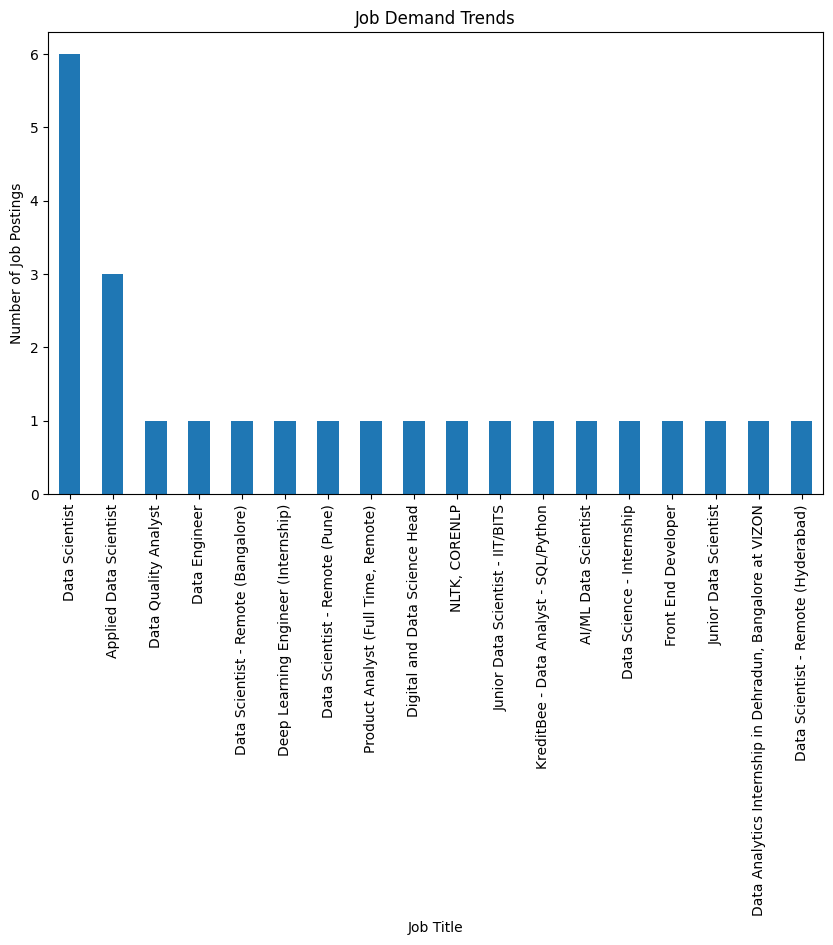

In [ ]:
# Visualization

# Plot Job Demand Trends
plt.figure(figsize=(10, 6))
job_demand_trends.plot(kind='bar')
plt.title("Job Demand Trends")
plt.xlabel("Job Title")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=90)
plt.show()


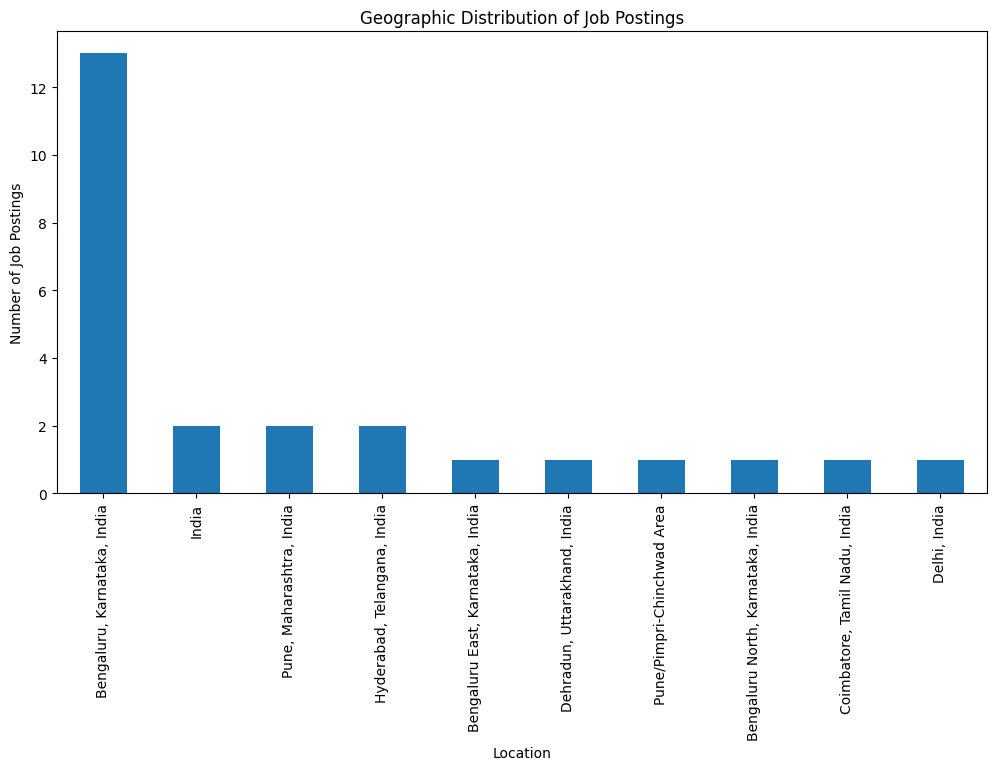

In [ ]:
# Plot Geographic Distribution
plt.figure(figsize=(12, 6))
geographic_distribution.plot(kind='bar')
plt.title("Geographic Distribution of Job Postings")
plt.xlabel("Location")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=90)
plt.show()

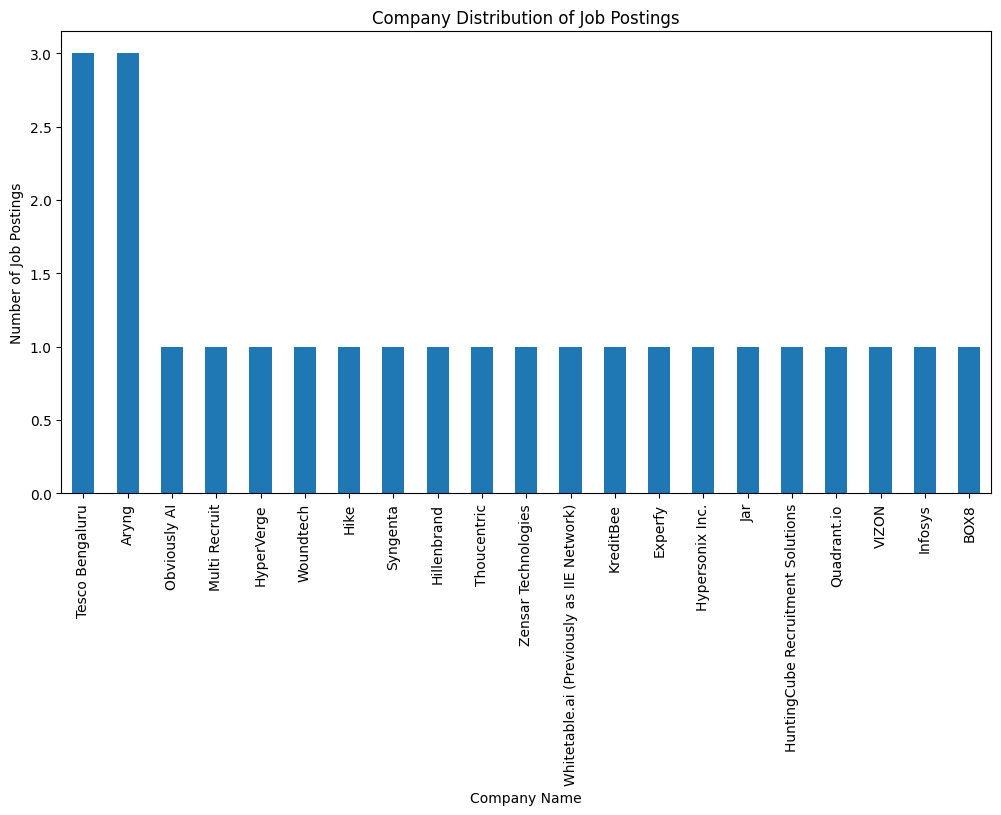

In [ ]:
#Company Distribution:Visualize the distribution of job postings among different companies to see which companies have the most job openings.
company_distribution = df['Company Name'].value_counts()
plt.figure(figsize=(12, 6))
company_distribution.plot(kind='bar')
plt.title("Company Distribution of Job Postings")
plt.xlabel("Company Name")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=90)
plt.show()

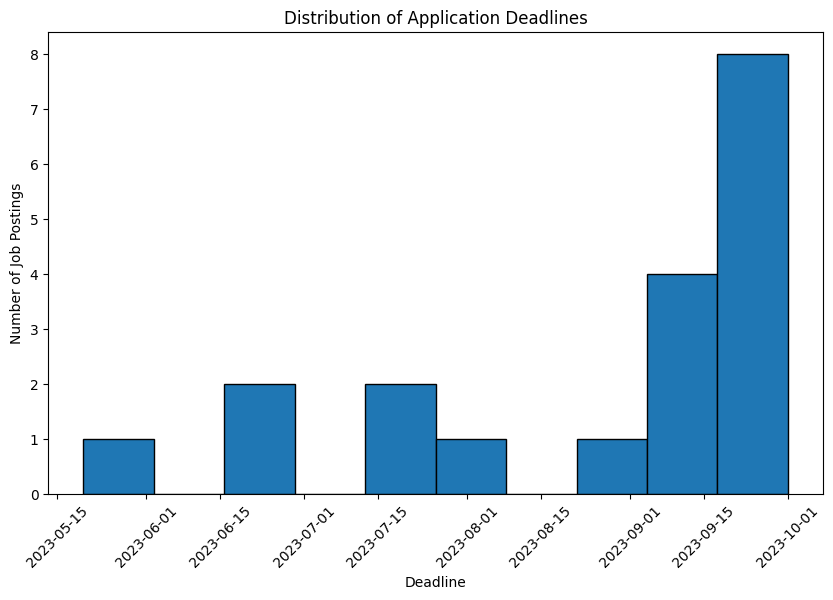

In [ ]:
#Application Deadlines:Create a histogram to visualize the distribution of application deadlines. This can help you understand the urgency of job postings.

# Convert the 'Deadline' column to datetime format
df['Deadline'] = pd.to_datetime(df['Deadline'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.hist(df['Deadline'], bins=10, edgecolor='k')
plt.title("Distribution of Application Deadlines")
plt.xlabel("Deadline")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45)
plt.show()


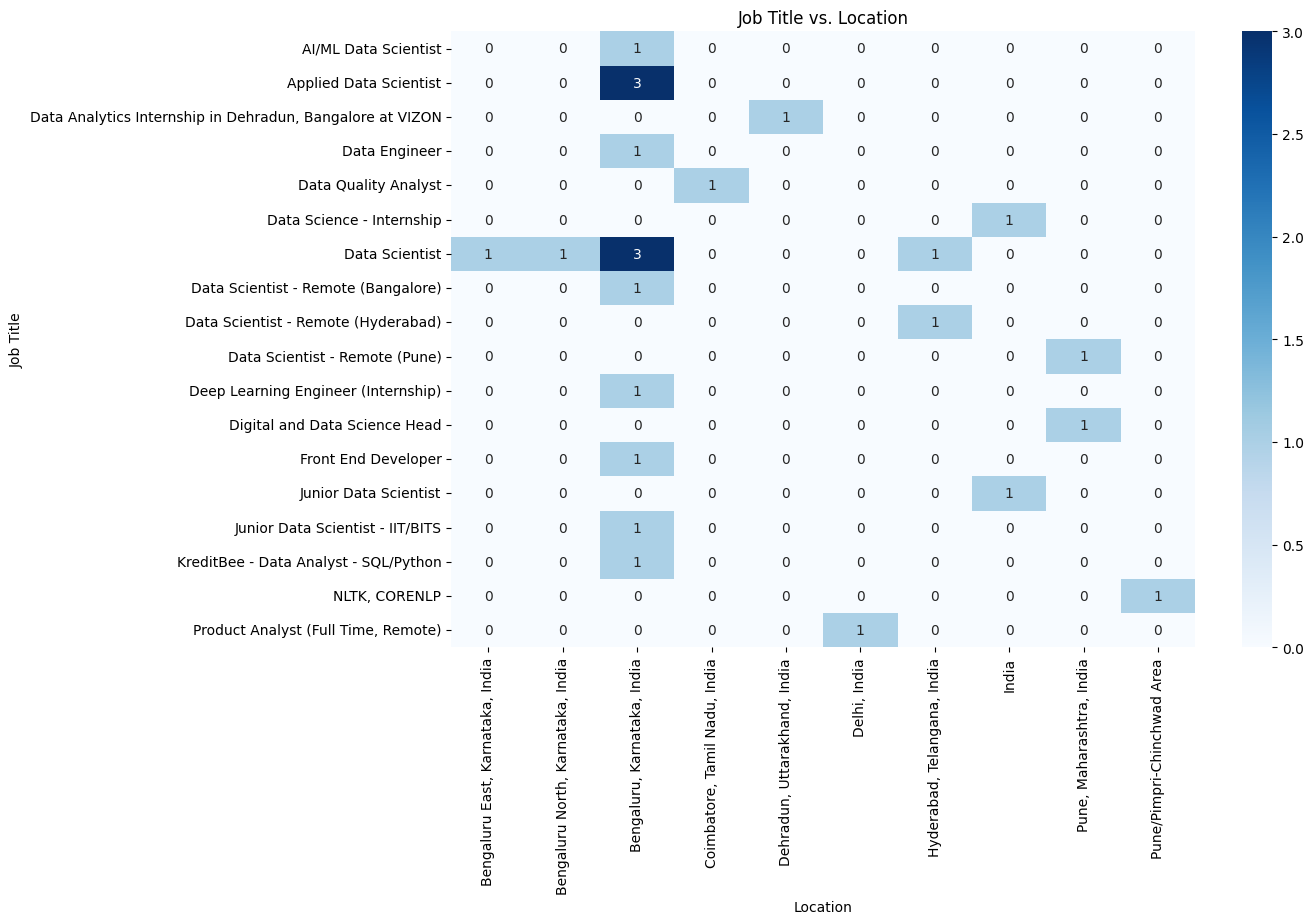

In [ ]:
#Job Title vs. Location:Create a heatmap to visualize which job titles are most prevalent in different locations. This can reveal regional job preferences.

job_location_counts = df.groupby(['Job Title', 'Location']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(job_location_counts, cmap='Blues', annot=True, fmt='d')
plt.title("Job Title vs. Location")
plt.xlabel("Location")
plt.ylabel("Job Title")
plt.xticks(rotation=90)
plt.show()


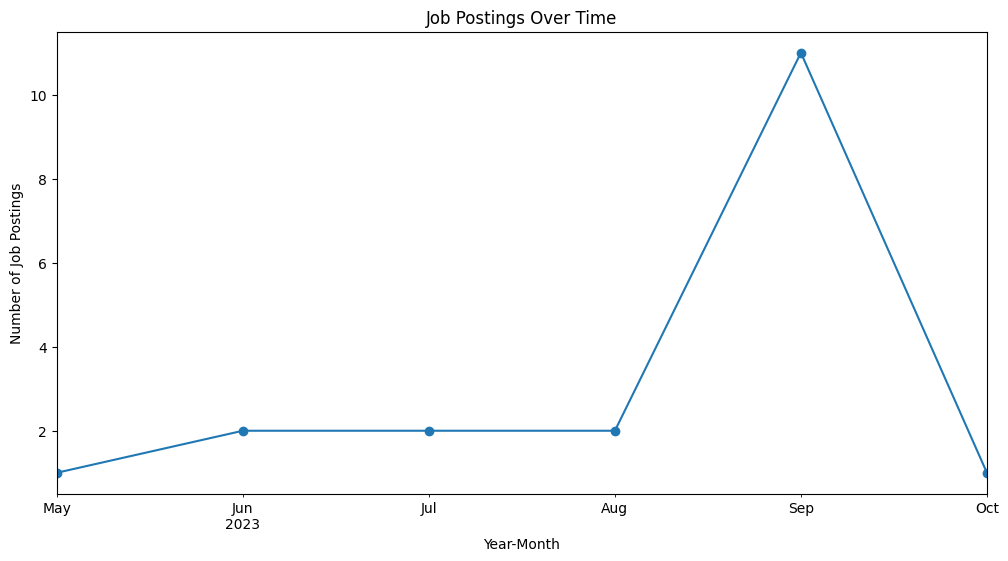

In [ ]:
#Time-Based Analysis:If you have data over a longer period, you can visualize trends in job postings over time to see if there are any seasonal patterns.


df['Year-Month'] = df['Deadline'].dt.to_period('M')
time_based_counts = df.groupby('Year-Month').size()

plt.figure(figsize=(12, 6))
time_based_counts.plot(kind='line', marker='o')
plt.title("Job Postings Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45)
plt.show()
